<h1> Title </h1>

In [1]:
import pandas as pd
import os
import tqdm

In [ ]:
pd.options.display.max_rows = 100
# pd.options.display.max_colwidth = 70
pd.set_option('precision', 2)

<h2>First, we combine all patients datasets into one large dataset </h2>

In [ ]:
data_path = '/home/student/Early_Prediction_of_Sepsis/data/train/'
patients = os.listdir('data/train')
df = pd.read_csv(os.path.join(data_path,patients[0]),delimiter ='|')
df['ID'] = patients[0].split('_')[-1].split('.')[0]
new_df = df[df['SepsisLabel']==0]
if max(df['SepsisLabel'])==1:
    new_df=new_df.append(df[df['SepsisLabel']==1][:1])
    new_df['Label'] = [1]*new_df.shape[0]
else:
    new_df['Label'] = [0]*new_df.shape[0]
stats = new_df.describe()
std = stats[(stats.index=='std')|(stats.index=='mean')]
std['ID'] = patients[0].split('_')[-1].split('.')[0]
for patient in tqdm.tqdm(patients[1:]):
    patient_path = os.path.join(data_path,patient)
    patient_number = patient.split('_')[-1].split('.')[0]
    tmp_df = pd.read_csv(os.path.join(data_path,patient_path),delimiter ='|')
    tmp_df['ID'] = patient_number
    # df = df.append(tmp_df)
    tmp_new_df = tmp_df[tmp_df['SepsisLabel']==0]
    if max(tmp_df['SepsisLabel'])==1:
        tmp_new_df=tmp_new_df.append(tmp_df[tmp_df['SepsisLabel']==1][:1])
        tmp_new_df['Label'] = [1]*tmp_new_df.shape[0]
    else:
        tmp_new_df['Label'] = [0]*tmp_new_df.shape[0]
    tmp_stats = tmp_new_df.describe()
    tmp_std = tmp_stats[(tmp_stats.index=='std')|(tmp_stats.index=='mean')]
    tmp_std['ID'] = patient_number
    std = std.append(tmp_std)
    new_df = new_df.append(tmp_new_df)

In [ ]:
# df.to_csv('train_data_combined.csv')
new_df.to_csv('filtered_train_data_combined.csv')
std.to_csv('stds_train_data.csv')

In [ ]:
new_df

In [ ]:
os.listdir()

In [ ]:
df = pd.read_csv('filtered_train_data_combined.csv')
std = pd.read_csv('stds_train_data.csv')

In [ ]:
demo_cols = ['ID','Age','Gender','Label','ICULOS']
demographic_df = df[demo_cols].groupby(by='ID').max()

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns;
sns.set(style="white", color_codes=True)
def plot_results(cols,rows, cols_names,df, type, title=None, figsize=(20,20)):
    fig,axes = plt.subplots(rows,cols, figsize=figsize)
    fig.tight_layout(pad=5.0)
    axes = axes.ravel()
    for i,col in enumerate(cols_names):
        if col!='Label':
            if type=='hist':
                sns.histplot(x=col,hue='Label',data=df, multiple="dodge", ax=axes[i])
                axes[i].set_title(col+' distribution by label')
            if type=='dist':
                sns.distplot(df[df['Label']==1][col], color='r',ax=axes[i])
                sns.distplot(df[df['Label']==0][col],ax=axes[i])
                axes[i].set_title(col+' distribution by label')
            elif type=='ts':
                axes[i].plot(df[df['Label']==1]['time_bm'],df[df['Label']==1][col], color='r')
                axes[i].plot(df[df['Label']==0]['time_bm'],df[df['Label']==0][col], color='b')
                axes[i].set_title(col+' change over time by label')
        else:
            sns.histplot(x=col,data=df, color='g',ax=axes[i])
            axes[i].set_title(col+' distribution')
    if title:
        plt.suptitle(title)

In [ ]:
plot_results(2,2,['Label','Age','Gender','ICULOS'],demographic_df,'hist')

In [ ]:
plot_results(2,2,['Label','Age','Gender','ICULOS'],demographic_df,'dist')

In [ ]:
std

HR -  Heart rate (beats per minute)
Temp -  Temperature (Deg C)
Resp -  Respiration rate (breaths per minute)
WBC -  Leukocyte count (count*10^3/µL)


קיומו של אלח דם מאושר אם ... הוכח כי שניים או יותר מהקריטריונים של תגובה דלקתית מערכתית (Systemic Inflammatory Response Syndrome – SIRS) מתקיימים:

דופק הגבוה מ-90 פעימות לדקה.
חום הגוף מתחת ל-36 מעלות צלזיוס או מעל 38 מעלות צלזיוס.
נשימת יתר (היפרוונטילציה), למעלה מ-20 נשימות לדקה, או לחץ פחמן דו-חמצני הנמוך מ-32mmHg בבדיקת גזים בדם.
מספר כדוריות דם לבנות קטן מ-4,000 תאים לכל מ"מ מעוקב של דם, או גדול מ-12,000 לאותה יחידת נפח, או מהווה למעלה מעשירית ממספר תאי מסילת הנבט (תאי דם לבנים לא בשלים).
צמרמורות


Platelets -  (count*10^3/µL)

A person may have sepsis if he or she has:
A high or low white blood cell count
A low platelet count

In [ ]:
plot_results(2,3,['HR','Temp','Resp','WBC','Platelets'],std[std.index=='mean'],'hist','Mean Per Patient')

In [ ]:
plot_results(2,3,['HR','Temp','Resp','WBC','Platelets'],std[std.index=='mean'],'dist','Mean Per Patient')

In [ ]:
for patient in patients:
    patient_df = df[df.ID==patient]
    label = patient_df['Label'].values[0]
    color = 'r' if label==1 else 'b'
    plt.plot(patient_df['ICULOS'],patient_df['HR'], color=color)
# sns.lineplot(data=df, x="ICULOS", y="HR", hue="Label", variable='ID')

In [ ]:
max_los = df[['ID','ICULOS']].groupby(by='ID').max().rename(columns={'ICULOS':'Max_ICULOS'})
max_los

In [ ]:
df=df.join(max_los,on='ID',how='left')
df['time_bm'] =  df['ICULOS']-df['Max_ICULOS']
df

In [ ]:
df[['ID','time_bm']].groupby(by='ID').min().describe()

In [ ]:
measures = ['HR','Temp','Resp','WBC','Platelets']
plot_results(2,3,measures,df_10hr,'ts')

In [ ]:
df[df['time_bm']>=-10].info()

In [ ]:
missing = pd.DataFrame(df[(df['time_bm']>=-10)&(df['Label']==0)].notna().sum(axis = 0).sort_values(ascending=False) / len(df[(df['time_bm']>=-10)&(df['Label']==0)]) * 100)
missing_1 = pd.DataFrame(df[(df['time_bm']>=-10)&(df['Label']==1)].notna().sum(axis = 0).sort_values(ascending=False) / len(df[(df['time_bm']>=-10)&(df['Label']==1)]) * 100)
missing[1] = missing_1[0]
vals = missing[~missing.index.isin(['Label','SepsisLabel','time_bm','Max_ICULOS','Unnamed: 0','ID'])].index.values


In [ ]:
missing[missing.index.isin(vals[30:40])]

In [ ]:
df_mean = df.groupby(by='ID').mean()

In [ ]:
missing_mean = pd.DataFrame(df_mean[df_mean['Label']==0].notna().sum(axis = 0).sort_values(ascending=False) / len(df_mean[df_mean['Label']==0]) * 100)
missing_mean_1 = pd.DataFrame(df_mean[df_mean['Label']==1].notna().sum(axis = 0).sort_values(ascending=False) / len(df_mean[df_mean['Label']==1]) * 100)
missing_mean[1] = missing_mean_1[0]

In [ ]:
vals = missing_mean[~missing_mean.index.isin(['Label','SepsisLabel','time_bm','Max_ICULOS','Unnamed: 0','ID'])].index.values

missing_mean

In [ ]:
df_mean_10hr = df[df['time_bm']>-10].groupby(by='ID').mean()

In [ ]:
missing_mean_10hr = pd.DataFrame(df_mean_10hr[df_mean_10hr['Label']==0].notna().sum(axis = 0).sort_values(ascending=False) / len(df_mean_10hr[df_mean_10hr['Label']==0]) * 100)
missing_mean_1_10hr = pd.DataFrame(df_mean_10hr[df_mean_10hr['Label']==1].notna().sum(axis = 0).sort_values(ascending=False) / len(df_mean_10hr[df_mean_10hr['Label']==1]) * 100)
missing_mean_10hr[1] = missing_mean_1_10hr[0]

# missing_mean[~missing_mean.index.isin(['Label','SepsisLabel','time_bm','Max_ICULOS','Unnamed: 0','ID'])].index.values

missing_mean_10hr[~missing_mean_10hr.index.isin(['Label','SepsisLabel','time_bm','Max_ICULOS','Unnamed: 0','ID'])]

In [ ]:
vals = missing_mean_10hr[~missing_mean_10hr.index.isin(['Label','SepsisLabel','time_bm','Max_ICULOS','Unnamed: 0','ID'])].index.values
missing_mean_10hr[missing_mean_10hr.index.isin(vals[30:])]

In [ ]:
plot_results(3,3,['Age','HR','Max_ICULOS','Temp','Resp','O2Sat','Platelets','FiO2','WBC'],df_mean_10hr,'dist','Mean Per Patient')

In [ ]:
df[df['time_bm']>-10].columns

In [ ]:
tmp = df.copy()
tmp['Unit3'] = ( (1*(tmp['Unit1']+tmp['Unit2'])<1) |
                      (tmp['Unit1'].isna() & tmp['Unit2'].isna()) )*1
tmp['Unit1'][tmp['Unit1'].isna()] = 0
tmp['Unit2'][tmp['Unit2'].isna()] = 0
# tmp[['Unit1','Unit2','Unit3']]

aggregated_df_10h = tmp[tmp['time_bm']>-10].groupby(['ID', 'Label','Gender']).agg({
                                                        'Unit1': 'max',\
                                                        'Unit2': 'max',\
                                                        'Unit3': 'max',\
                                                        'ICULOS': 'max',\
                                                        'HR': ['median', 'max'],\
                                                        'MAP': ['median', 'min'],\
                                                        'O2Sat': ['mean'],\
                                                        'Resp': ['median', 'max'],\
                                                        'SBP': ['median', 'min'],\
                                                        'Hct': ['median', 'min'],\
                                                        'Potassium': 'mean',\
                                                        'Glucose': 'mean',\
                                                        'Temp': ['mean', 'min'],\
                                                        'DBP': 'mean',\
                                                        'WBC': ['median', 'min'],\
                                                        'EtCO2': 'mean',\
                                                        'BaseExcess': 'mean',\
                                                        'HCO3': 'mean',\
                                                        'FiO2': 'mean',\
                                                        'SaO2': 'mean',\
                                                        'AST': 'mean',\
                                                        'Lactate': 'mean',\
                                                        'var': 'mean',\
                                                        'Magnesium': 'mean',\
                                                        'Phosphate': 'mean',\
                                                        'TroponinI': 'mean',\
                                                        'Hgb': 'mean',\
                                                        'PTT': 'mean',\
                                                        'Platelets': 'mean',\
                                                        'Age': 'mean',\
                                                        'HospAdmTime': 'mean',\
                                                        # f'{window_size}w_sum_BaseExcess': 'mean',\
                                                        # f'{window_size}w_sum_FiO2': 'mean',\
                                                        # f'{window_size}w_sum_pH': 'mean',\
                                                        # f'{window_size}w_sum_PaCO2': 'mean',\
                                                        # f'{window_size}w_sum_Glucose': 'mean',\
                                                        # f'{window_size}w_sum_Lactate': 'mean',\
                                                        # f'{window_size}w_sum_PTT': 'mean'\
                                                        }).reset_index()
aggregated_df_10h.columns = ['__'.join(col).strip() for col in aggregated_df_10h.columns.values]
aggregated_df_10h.rename(columns={"ID__": "ID", "Label__": "Label", "Gender__":"Gender"}, inplace=True)

In [ ]:
aggregated_df_10h.columns

In [ ]:
plot_results(3,3,['ICULOS__max', 'HR__median', 'HR__max',\
                  'Resp__median', 'Resp__max', 'SBP__median',\
                  'WBC__median', 'WBC__min', 'O2Sat__mean',\
                  # 'Max_ICULOS','Temp','Resp','O2Sat','Platelets','FiO2','WBC'
                  ],aggregated_df_10h,'dist',figsize=(16,10))

In [ ]:
plot_results(3,1,['Unit1__max','Unit2__max','Unit3__max',\
                  # 'Max_ICULOS','Temp','Resp','O2Sat','Platelets','FiO2','WBC'
                  ],aggregated_df_10h,'dist',figsize=(12,4))

In [ ]:
missing_mean_10hr.T[list(missing_mean_10hr.T.columns)[1:]]

In [ ]:
list(missing_mean_10hr.columns)

In [ ]:
df_mean = df.groupby(by='ID').mean()

In [39]:
missing_mean = pd.DataFrame(df_mean[df_mean['Label']==0].notna().sum(axis = 0).sort_values(ascending=False) / len(df_mean[df_mean['Label']==0]) * 100)
missing_mean_1 = pd.DataFrame(df_mean[df_mean['Label']==1].notna().sum(axis = 0).sort_values(ascending=False) / len(df_mean[df_mean['Label']==1]) * 100)
missing_mean[1] = missing_mean_1[0]

In [58]:
vals = missing_mean[~missing_mean.index.isin(['Label','SepsisLabel','time_bm','Max_ICULOS','Unnamed: 0','ID'])].index.values

missing_mean

,0,1
Unnamed: 0,100.000000,100.000000
Age,100.000000,100.000000
SepsisLabel,100.000000,100.000000
ICULOS,100.000000,100.000000
HospAdmTime,100.000000,100.000000
Gender,100.000000,100.000000
Label,100.000000,100.000000
HR,99.983858,87.632509
O2Sat,99.940812,87.279152
Resp,99.854722,86.713781


In [66]:
df_mean_10hr = df[df['time_bm']>-10].groupby(by='ID').mean()

In [67]:
missing_mean_10hr = pd.DataFrame(df_mean_10hr[df_mean_10hr['Label']==0].notna().sum(axis = 0).sort_values(ascending=False) / len(df_mean_10hr[df_mean_10hr['Label']==0]) * 100)
missing_mean_1_10hr = pd.DataFrame(df_mean_10hr[df_mean_10hr['Label']==1].notna().sum(axis = 0).sort_values(ascending=False) / len(df_mean_10hr[df_mean_10hr['Label']==1]) * 100)
missing_mean_10hr[1] = missing_mean_1_10hr[0]

# missing_mean[~missing_mean.index.isin(['Label','SepsisLabel','time_bm','Max_ICULOS','Unnamed: 0','ID'])].index.values

missing_mean_10hr[~missing_mean_10hr.index.isin(['Label','SepsisLabel','time_bm','Max_ICULOS','Unnamed: 0','ID'])]

,0,1
Age,100.000000,100.000000
ICULOS,100.000000,100.000000
HospAdmTime,100.000000,100.000000
Gender,100.000000,100.000000
HR,99.548023,86.784452
O2Sat,98.902341,86.431095
MAP,98.875437,86.360424
Resp,98.703255,84.946996
Temp,97.390369,81.625442
SBP,96.857681,80.000000


In [79]:
vals = missing_mean_10hr[~missing_mean_10hr.index.isin(['Label','SepsisLabel','time_bm','Max_ICULOS','Unnamed: 0','ID'])].index.values
missing_mean_10hr[missing_mean_10hr.index.isin(vals[30:])]

,0,1
BaseExcess,12.10,30.11
SaO2,8.84,17.31
Bilirubin_total,8.79,12.51
AST,8.68,12.79
Alkalinephos,8.60,12.58
Lactate,5.67,20.42
TroponinI,5.05,5.16
Fibrinogen,2.29,4.52
EtCO2,2.04,8.69
Bilirubin_direct,0.87,1.27


/data/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/data/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/data/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

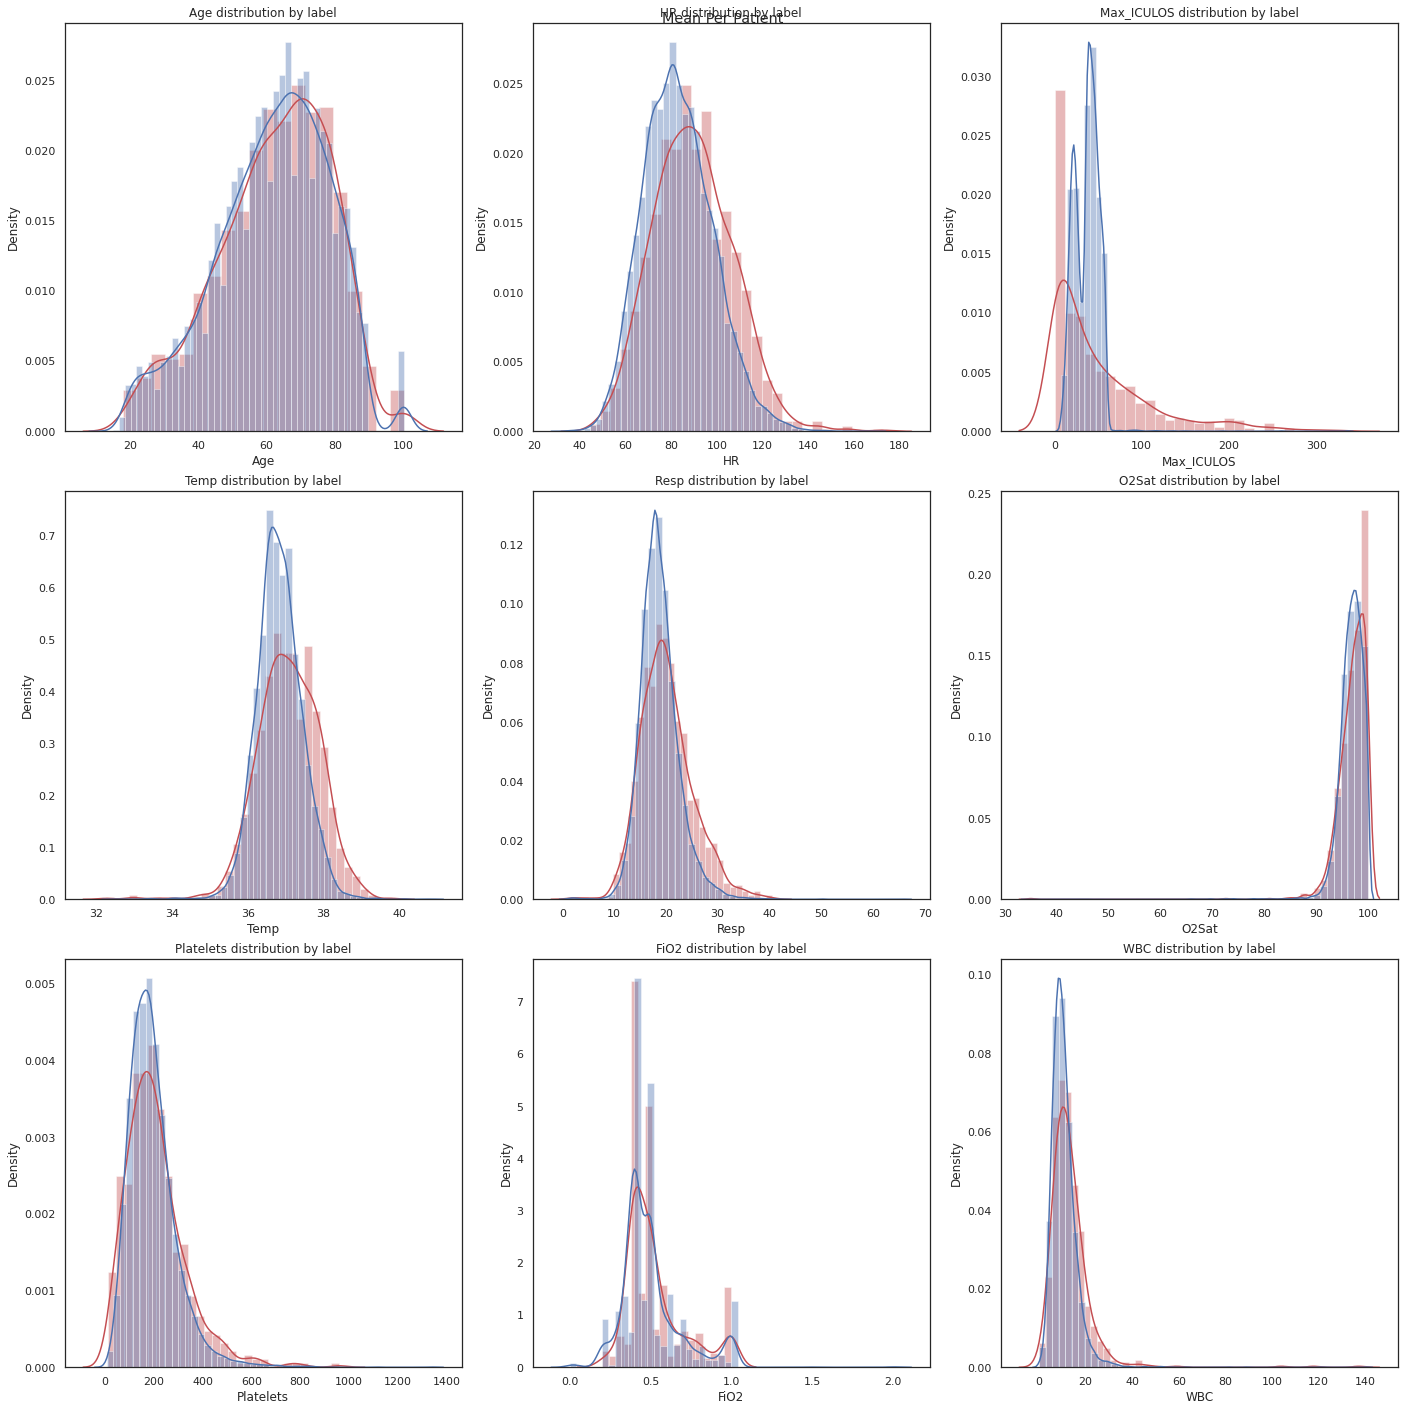

In [86]:
plot_results(3,3,['Age','HR','Max_ICULOS','Temp','Resp','O2Sat','Platelets','FiO2','WBC'],df_mean_10hr,'dist','Mean Per Patient')

In [90]:
df[df['time_bm']>-10].columns

Index(['Unnamed: 0', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp',
       'EtCO2', 'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST',
       'BUN', 'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine',
       'Bilirubin_direct', 'Glucose', 'Lactate', 'Magnesium', 'Phosphate',
       'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel', 'ID', 'Label', 'Max_ICULOS',
       'time_bm'],
      dtype='object')

In [105]:
tmp = df.copy()
tmp['Unit3'] = ( (1*(tmp['Unit1']+tmp['Unit2'])<1) |
                      (tmp['Unit1'].isna() & tmp['Unit2'].isna()) )*1
tmp['Unit1'][tmp['Unit1'].isna()] = 0
tmp['Unit2'][tmp['Unit2'].isna()] = 0
# tmp[['Unit1','Unit2','Unit3']]

aggregated_df_10h = tmp[tmp['time_bm']>-10].groupby(['ID', 'Label','Gender']).agg({
                                                        'Unit1': 'max',\
                                                        'Unit2': 'max',\
                                                        'Unit3': 'max',\
                                                        'ICULOS': 'max',\
                                                        'HR': ['median', 'max'],\
                                                        'MAP': ['median', 'min'],\
                                                        'O2Sat': ['mean'],\
                                                        'Resp': ['median', 'max'],\
                                                        'SBP': ['median', 'min'],\
                                                        'Hct': ['median', 'min'],\
                                                        'Potassium': 'mean',\
                                                        'Glucose': 'mean',\
                                                        'Temp': ['mean', 'min'],\
                                                        'DBP': 'mean',\
                                                        'WBC': ['median', 'min'],\
                                                        'EtCO2': 'mean',\
                                                        'BaseExcess': 'mean',\
                                                        'HCO3': 'mean',\
                                                        'FiO2': 'mean',\
                                                        'SaO2': 'mean',\
                                                        'AST': 'mean',\
                                                        'Lactate': 'mean',\
                                                        'var': 'mean',\
                                                        'Magnesium': 'mean',\
                                                        'Phosphate': 'mean',\
                                                        'TroponinI': 'mean',\
                                                        'Hgb': 'mean',\
                                                        'PTT': 'mean',\
                                                        'Platelets': 'mean',\
                                                        'Age': 'mean',\
                                                        'HospAdmTime': 'mean',\
                                                        # f'{window_size}w_sum_BaseExcess': 'mean',\
                                                        # f'{window_size}w_sum_FiO2': 'mean',\
                                                        # f'{window_size}w_sum_pH': 'mean',\
                                                        # f'{window_size}w_sum_PaCO2': 'mean',\
                                                        # f'{window_size}w_sum_Glucose': 'mean',\
                                                        # f'{window_size}w_sum_Lactate': 'mean',\
                                                        # f'{window_size}w_sum_PTT': 'mean'\
                                                        }).reset_index()
aggregated_df_10h.columns = ['__'.join(col).strip() for col in aggregated_df_10h.columns.values]
aggregated_df_10h.rename(columns={"ID__": "ID", "Label__": "Label", "Gender__":"Gender"}, inplace=True)

<ipython-input-105-f7c2010630c7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['Unit1'][tmp['Unit1'].isna()] = 0
<ipython-input-105-f7c2010630c7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['Unit2'][tmp['Unit2'].isna()] = 0


In [106]:
aggregated_df_10h.columns

Index(['ID', 'Label', 'Gender', 'Unit1__max', 'Unit2__max', 'Unit3__max',
       'ICULOS__max', 'HR__median', 'HR__max', 'MAP__median', 'MAP__min',
       'O2Sat__mean', 'Resp__median', 'Resp__max', 'SBP__median', 'SBP__min',
       'Hct__median', 'Hct__min', 'Potassium__mean', 'Glucose__mean',
       'Temp__mean', 'Temp__min', 'DBP__mean', 'WBC__median', 'WBC__min'],
      dtype='object')

/data/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/data/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/data/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

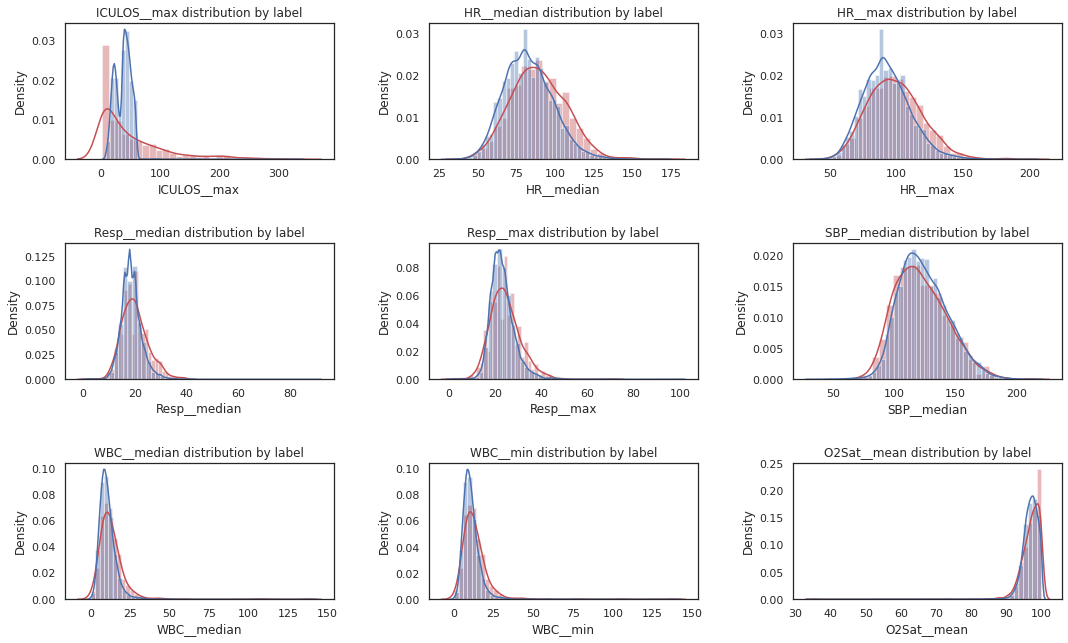

In [110]:
plot_results(3,3,['ICULOS__max', 'HR__median', 'HR__max',\
                  'Resp__median', 'Resp__max', 'SBP__median',\
                  'WBC__median', 'WBC__min', 'O2Sat__mean',\
                  # 'Max_ICULOS','Temp','Resp','O2Sat','Platelets','FiO2','WBC'
                  ],aggregated_df_10h,'dist',figsize=(16,10))

/data/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/data/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/data/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

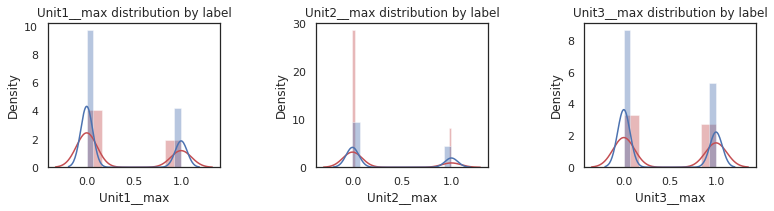

In [117]:
plot_results(3,1,['Unit1__max','Unit2__max','Unit3__max',\
                  # 'Max_ICULOS','Temp','Resp','O2Sat','Platelets','FiO2','WBC'
                  ],aggregated_df_10h,'dist',figsize=(12,4))

In [37]:
missing_mean_10hr.T[list(missing_mean_10hr.T.columns)[1:]]

,Age,Max_ICULOS,Label,SepsisLabel,ICULOS,HospAdmTime,Gender,time_bm,HR,O2Sat,...,BaseExcess,SaO2,Bilirubin_total,AST,Alkalinephos,Lactate,TroponinI,Fibrinogen,EtCO2,Bilirubin_direct
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.548023,98.902341,...,12.101157,8.835082,8.792037,8.684423,8.598332,5.671240,5.047081,2.286790,2.04466,0.871671
1,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,86.784452,86.431095,...,30.106007,17.314488,12.508834,12.791519,12.579505,20.424028,5.159011,4.522968,8.69258,1.272085


In [ ]:
list(missing_mean_10hr.columns)

In [9]:
missing_mean = pd.DataFrame(df_mean[df_mean['Label']==0].notna().sum(axis = 0).sort_values(ascending=False) / len(df_mean[df_mean['Label']==0]) * 100)
missing_mean_1 = pd.DataFrame(df_mean[df_mean['Label']==1].notna().sum(axis = 0).sort_values(ascending=False) / len(df_mean[df_mean['Label']==1]) * 100)
missing_mean[1] = missing_mean_1[0]

In [10]:
missing_mean

,0,1
Unnamed: 0,100.000000,100.000000
Age,100.000000,100.000000
SepsisLabel,100.000000,100.000000
ICULOS,100.000000,100.000000
HospAdmTime,100.000000,100.000000
Gender,100.000000,100.000000
Label,100.000000,100.000000
HR,99.983858,87.632509
O2Sat,99.940812,87.279152
Resp,99.854722,86.713781


In [14]:
df_mean_10hr = df[df['time_bm']>-10].groupby(by='ID').mean()

In [20]:
missing_mean_10hr = pd.DataFrame(df_mean_10hr[df_mean_10hr['Label']==0].notna().sum(axis = 0).sort_values(ascending=False) / len(df_mean_10hr[df_mean_10hr['Label']==0]) * 100)
missing_mean_1_10hr = pd.DataFrame(df_mean_10hr[df_mean_10hr['Label']==1].notna().sum(axis = 0).sort_values(ascending=False) / len(df_mean_10hr[df_mean_10hr['Label']==1]) * 100)
missing_mean_10hr[1] = missing_mean_1_10hr[0]
missing_mean_10hr

,0,1
Unnamed: 0,100.000000,100.000000
Age,100.000000,100.000000
Max_ICULOS,100.000000,100.000000
Label,100.000000,100.000000
SepsisLabel,100.000000,100.000000
ICULOS,100.000000,100.000000
HospAdmTime,100.000000,100.000000
Gender,100.000000,100.000000
time_bm,100.000000,100.000000
HR,99.548023,86.784452


In [19]:
missing_mean_10hr.T[list(missing_mean_10hr.T.columns)[1:]]

,Age,Max_ICULOS,Label,SepsisLabel,ICULOS,HospAdmTime,Gender,time_bm,HR,O2Sat,...,BaseExcess,SaO2,Bilirubin_total,AST,Alkalinephos,Lactate,TroponinI,Fibrinogen,EtCO2,Bilirubin_direct
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.548023,98.902341,...,12.101157,8.835082,8.792037,8.684423,8.598332,5.671240,5.047081,2.286790,2.04466,0.871671
1,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,86.784452,86.431095,...,30.106007,17.314488,12.508834,12.791519,12.579505,20.424028,5.159011,4.522968,8.69258,1.272085


In [18]:
list(missing_mean_10hr.columns)

[0, 1]

In [6]:
features = list(missing[(missing[0]>80)&(missing[1]>80)].index)
non_ts_features = ['Unnamed: 0',
 'Age',
 'Max_ICULOS',
 'Label',
 'ID',
 'SepsisLabel',
 'ICULOS',
 'HospAdmTime',
 'Gender',
 'time_bm']
new_features = []
for x in features:
    if x not in non_ts_features:
        new_features.append(x)

In [29]:
new_features

['HR', 'MAP', 'O2Sat', 'Resp', 'SBP']

In [32]:
df_10hr = df[df['time_bm']>=-10]
df_10hr=df_10hr[features].groupby(by=['Label','time_bm']).mean().reset_index()

/data/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/data/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/data/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

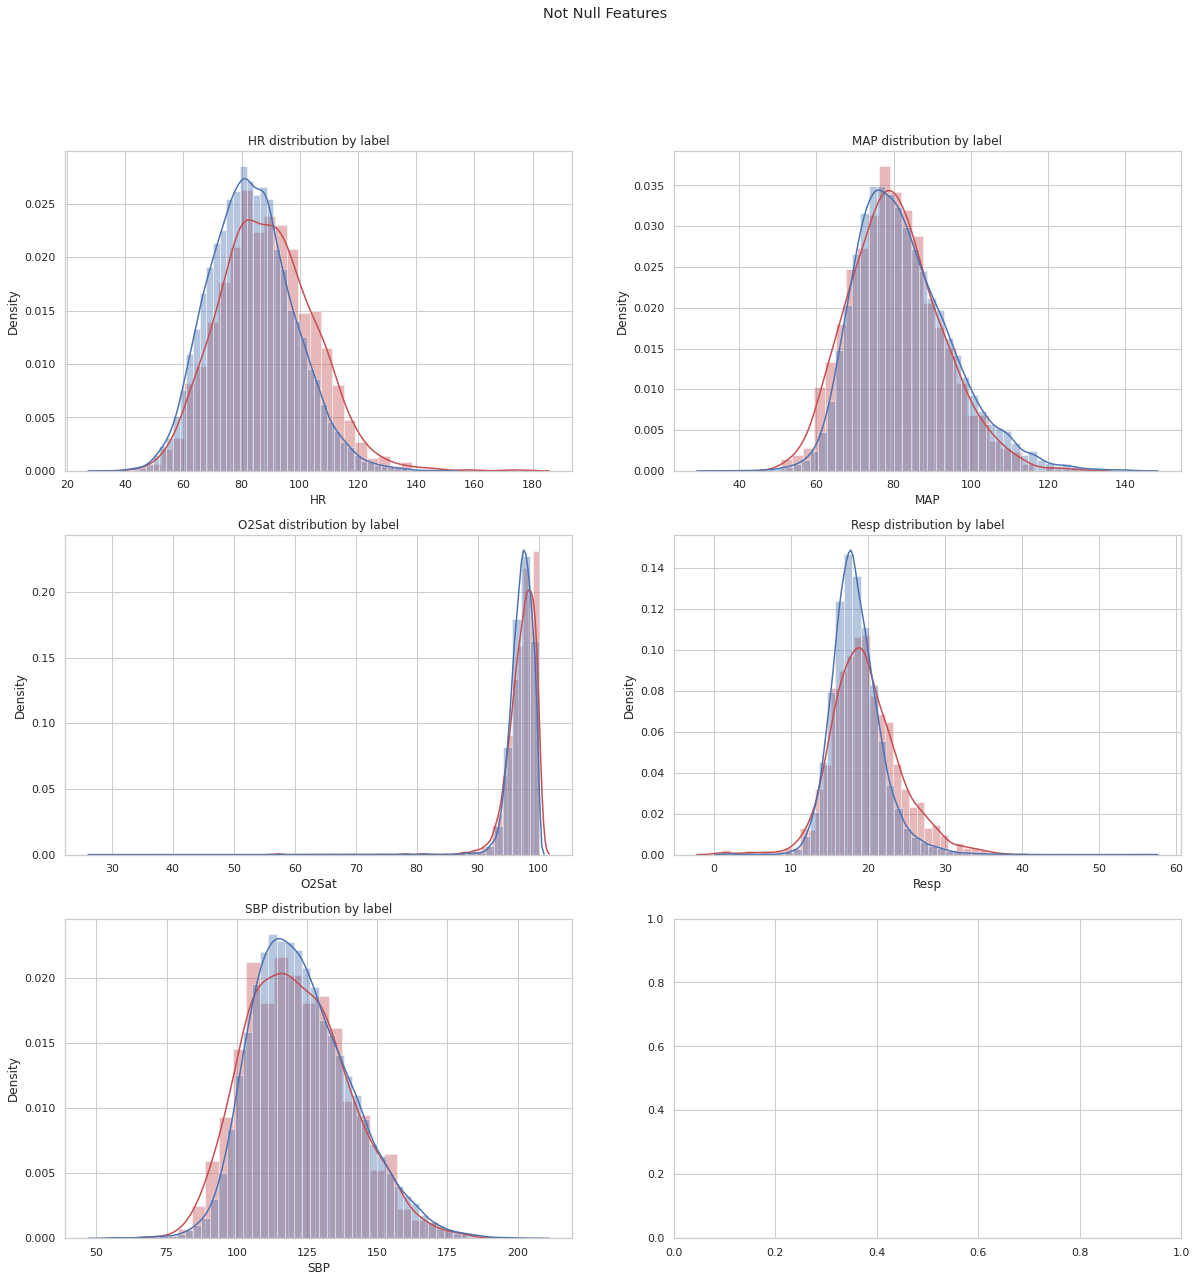

In [44]:
plot_results(2,3,new_features,std[std['Unnamed: 0']=='mean'],'dist', title='Not Null Features')

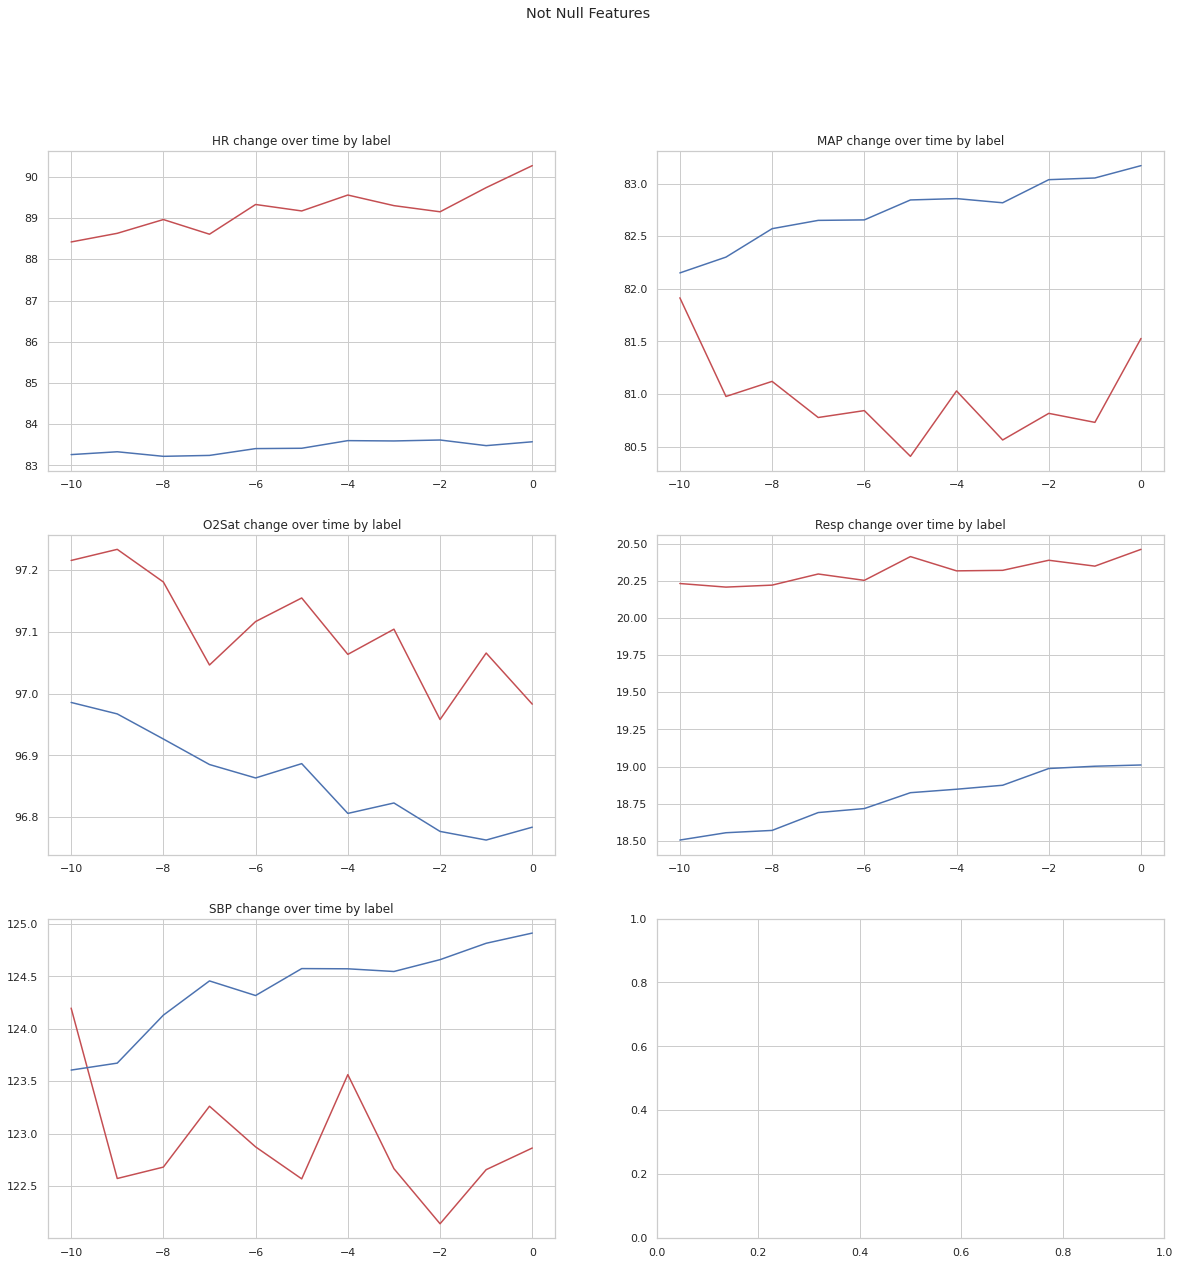

In [45]:
plot_results(2,3,new_features,df_10hr,'ts', title='Not Null Features')

/data/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/data/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/data/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

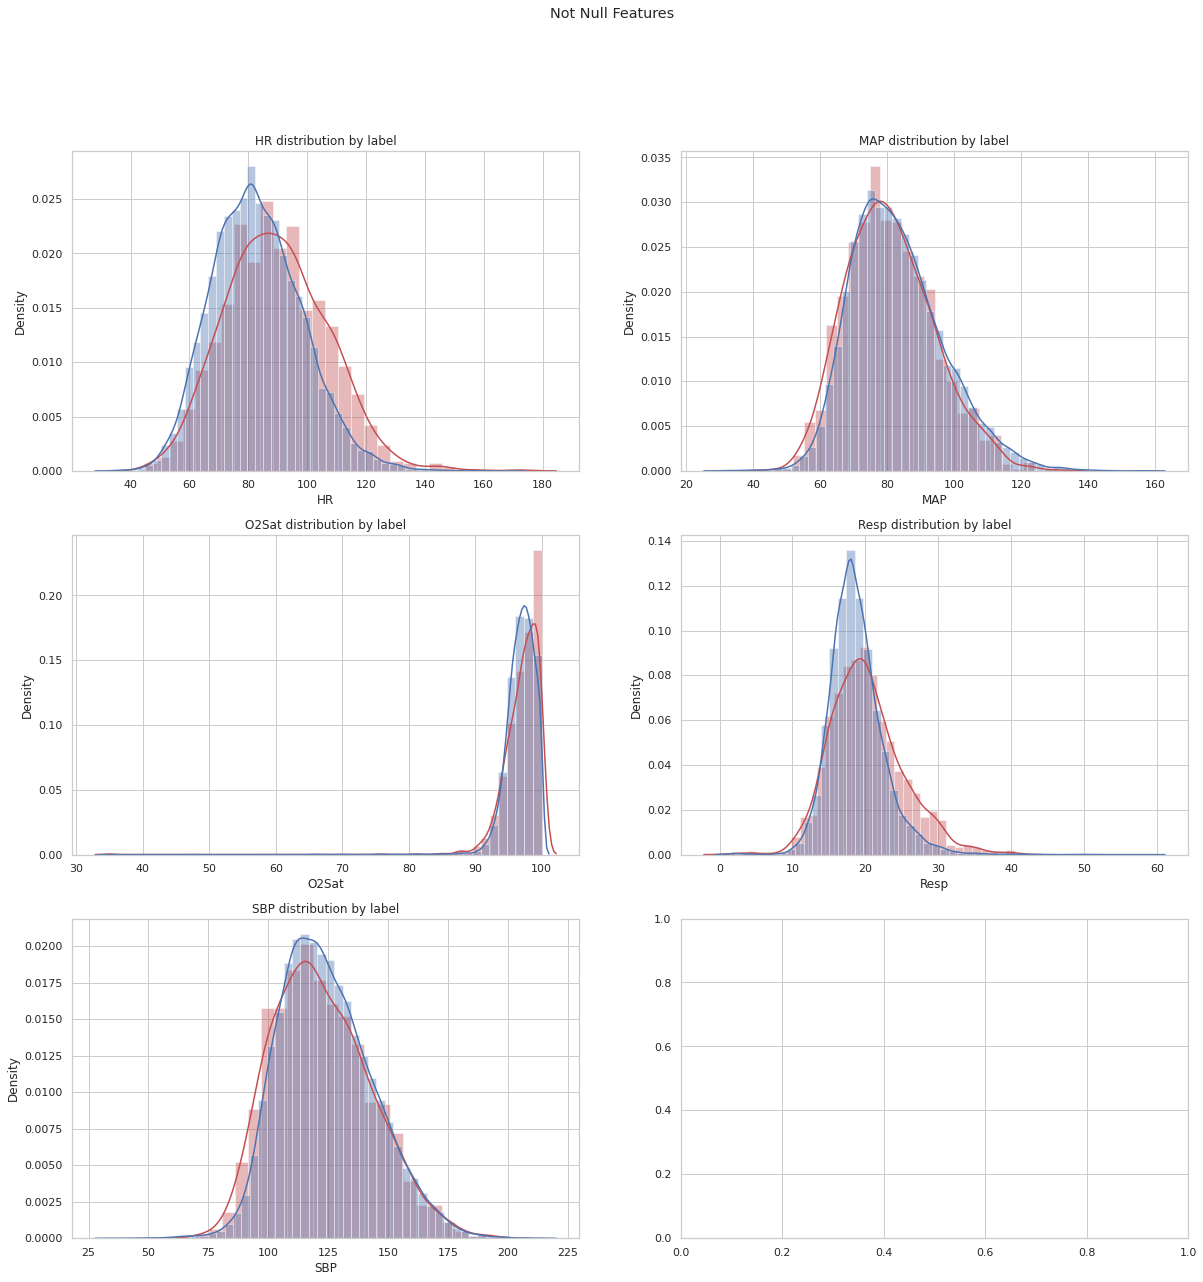

In [56]:
df_10hr_meanp= df[df['time_bm']>=-10].groupby(by='ID').mean()
plot_results(2,3,new_features,df_10hr_meanp,'dist', title='Not Null Features')

,Unnamed: 0,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,...,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Label,Max_ICULOS,time_bm
ID,,,,,,,,,,,,,,,,,,,,,
0,17.0,58.636364,95.909091,36.073333,137.500000,60.045455,42.500000,12.625000,NaN,NaN,...,75.91,0.0,0.0,1.0,-98.60,18.0,0.000000,0.0,23.0,-5.0
1,19.0,93.818182,100.000000,37.520000,145.636364,89.136364,62.272727,17.500000,NaN,1.0,...,65.79,1.0,NaN,NaN,-0.02,21.0,0.090909,1.0,26.0,-5.0
2,30.0,80.000000,95.500000,36.710000,144.000000,93.333000,NaN,17.600000,NaN,NaN,...,52.88,1.0,1.0,0.0,-0.01,33.0,0.000000,0.0,38.0,-5.0
3,39.0,70.090909,96.727273,37.110000,137.431818,88.636364,71.681818,17.318182,NaN,NaN,...,49.52,1.0,NaN,NaN,-0.02,43.0,0.000000,0.0,48.0,-5.0
4,18.0,100.272727,95.181818,36.833333,113.363636,83.181818,63.272727,18.363636,NaN,NaN,...,73.00,1.0,1.0,0.0,-214.64,19.0,0.000000,0.0,24.0,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,23.0,110.400000,97.100000,37.610000,110.400000,83.100000,67.300000,19.800000,NaN,NaN,...,59.71,1.0,0.0,1.0,-4.12,24.0,0.000000,0.0,29.0,-5.0
19996,37.0,64.545455,99.090909,35.946667,146.272727,115.272727,93.181818,16.181818,NaN,5.0,...,65.83,1.0,NaN,NaN,-0.03,38.0,0.000000,0.0,43.0,-5.0
19997,8.0,72.818182,98.318182,37.576667,146.545455,89.121818,NaN,17.454545,NaN,NaN,...,79.42,0.0,1.0,0.0,-0.02,10.0,0.000000,0.0,15.0,-5.0


In [60]:
mean_by_Label = df_10hr_meanp.groupby(by='Label').mean().reset_index()
mean_by_Label[mean_by_Label['Label']==0]['HR'].values[0]

83.14590987251529

<h2> Hypothesis Testing </h2>
We will use T-Test to check if the mean feature for each patients is from the same distribution for patients that had sepsis and patients that didnt.


In [54]:
from scipy.stats import ttest_ind
def test_new_features(tmp, type,new_features):
    diff = []
    for feature in new_features:
        if type == 'mean+std':
            sepsis =tmp[tmp['Label']['mean']==1]
            sepsis = sepsis[feature]['mean']+sepsis[feature]['std']
            sepsis = sepsis[sepsis.notna()].values
            not_sepsis =tmp[tmp['Label']['mean']==0]
            not_sepsis = not_sepsis[feature]['mean']+not_sepsis[feature]['std']
            not_sepsis = not_sepsis[not_sepsis.notna()].values
        else:
            sepsis =tmp[tmp['Label']['mean']==1]
            sepsis = sepsis[feature][type]
            sepsis = sepsis[sepsis.notna()].values
            not_sepsis =tmp[tmp['Label']['mean']==0]
            not_sepsis = not_sepsis[feature][type]
            not_sepsis = not_sepsis[not_sepsis.notna()].values
        stat,p = ttest_ind(sepsis,not_sepsis)
        # print(f'** {feature} **')
        # print(f'P-value ={p}')
        if p<0.05:
            diff.append(feature)
    return diff

In [76]:
df[df['time_bm']>=-7].groupby(by='ID').agg(['mean','std'])['HR']

,mean,std
ID,,
0,57.125000,3.356763
1,96.375000,4.068608
2,79.714286,6.550173
3,67.750000,4.519798
4,100.625000,4.779047
...,...,...
19995,109.500000,4.140393
19996,64.625000,5.902481
19997,71.750000,5.284749


In [68]:
diffs = {}
max_diff_len = 0
max_diff = 0
new_features = list(df.columns)[1:]
new_features =  [x for x in new_features if x not in ['ID','Label','time_bm']]
for h in range(0,20):
    print('*'*10,f'h={h}','*'*10)
    tmp_df= df[df['time_bm']>=-h].groupby(by='ID').agg(['mean','std'])
    for t in ['mean+std','mean','std']:
        diff = test_new_features(tmp_df,t,new_features)
        print(f'type={t}, number of different distributions: {len(diff)}, different distributions: {diff}')

********** h=0 **********
type=mean+std, number of different distributions: 0, different distributions: []
type=mean, number of different distributions: 17, different distributions: ['HR', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'FiO2', 'Calcium', 'WBC', 'Fibrinogen', 'Gender', 'Unit1', 'Unit2', 'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Max_ICULOS']
type=std, number of different distributions: 0, different distributions: []
********** h=1 **********
type=mean+std, number of different distributions: 11, different distributions: ['HR', 'MAP', 'DBP', 'Resp', 'BUN', 'Unit1', 'Unit2', 'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Max_ICULOS']
type=mean, number of different distributions: 22, different distributions: ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'HCO3', 'FiO2', 'BUN', 'Calcium', 'Chloride', 'Hct', 'WBC', 'Fibrinogen', 'Gender', 'Unit1', 'Unit2', 'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Max_ICULOS']
type=std, number of different distributions: 5, different distributions: ['Temp

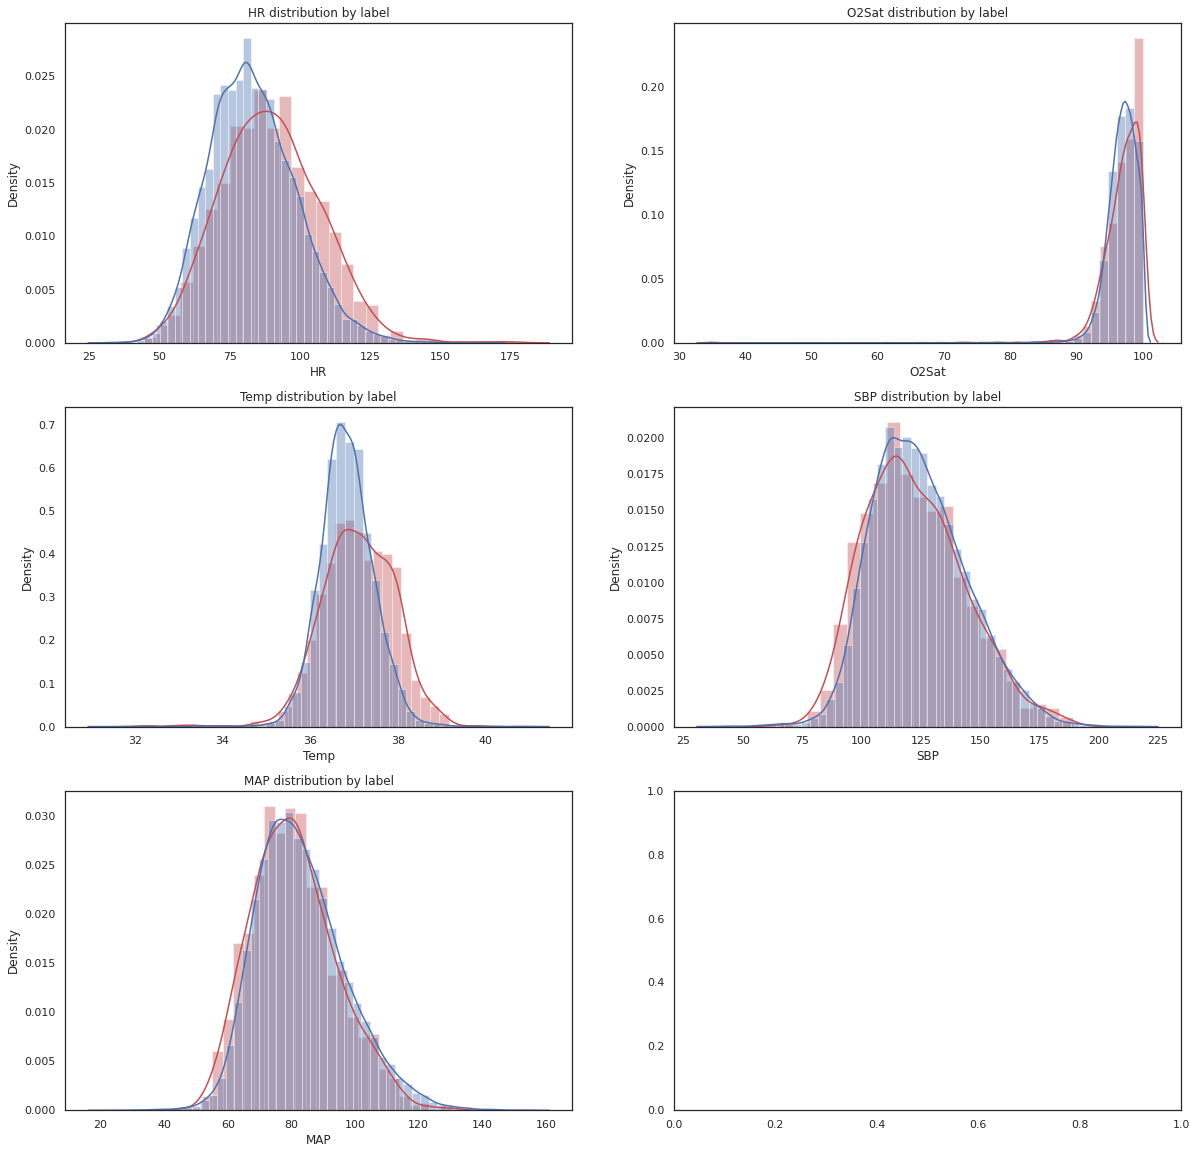

In [71]:
df_7hr_meanp= df[df['time_bm']>=-7].groupby(by='ID').mean()
plot_results(2,3,['HR', 'O2Sat', 'Temp', 'SBP', 'MAP'],df_7hr_meanp,'dist')

In [74]:
map_sep = df_7hr_meanp[(df_7hr_meanp['Label']==1)&(~df_7hr_meanp['MAP'].isna())]['MAP'].values
map_not_sep = df_7hr_meanp[(df_7hr_meanp['Label']==0)&(~df_7hr_meanp['MAP'].isna())]['MAP'].values
stat,p = ttest_ind(map_sep,map_not_sep)
if p<0.05:
    print('not the same')

not the same


In [1]:
print('h')

h
